# FAOSTAT data imporation study and optimization

This notebook is a study of the faostat package, which allows to directly retrieve data about several agricultural and economic parameters. All of it comes from the Food and Agriculture Organization of the United States

In [1]:
import pandas as pd
import numpy as np
import faostat
import matplotlib.pyplot as plt
import random
import seaborn as sns

### Encoding the types of data 

First of all, we'll import dictionaries that encode certain parameters. We need this codification for later use on querying specific subsets of data

In [2]:
datasets = faostat.list_datasets() # A list of tuples containing each dataset available. The first tuple contains the header of the information

In [3]:
datasets [0]

('code',
 'label',
 'date_update',
 'note_update',
 'release_current',
 'state_current',
 'year_current',
 'release_next',
 'state_next',
 'year_next')

In [4]:
datasets[1:3]

[('QCL',
  'Crops and livestock products',
  '2023-03-24',
  'minor revision',
  '2022-12-23 / 2023-03-24',
  'final',
  '2021',
  '2023-12',
  'final',
  '2022'),
 ('QI',
  'Production Indices',
  '2023-03-21',
  '',
  '2023-03-21',
  'final',
  '2021',
  '2023-12',
  'final',
  '2022')]

The first element of each tuple (code) is what we want to get a specific dataset in future functions (whenever "code" is asked for).

The following dictionaries will be applicable for Crops and livestock products ('QCL')

In [5]:
areas_QCL = faostat.get_areas('QCL')
elements_QCL = faostat.get_elements('QCL')
items_QCL = faostat.get_items('QCL')

In [6]:
print('Sample of encoding for countries, elements(value) and items:')
for dict in areas_QCL,elements_QCL,items_QCL:
    print(list(dict.items())[1:5])

Sample of encoding for countries, elements(value) and items:
[('Albania', '3'), ('Algeria', '4'), ('Angola', '7'), ('Antigua and Barbuda', '8')]
[('Yield', '2413'), ('Production Quantity', '2510'), ('Stocks', '2111'), ('Producing Animals/Slaughtered', '2313')]
[('Agave fibres, raw, n.e.c.', '800'), ('Almonds, in shell', '221'), ('Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw', '711'), ('Apples', '515')]


This will be useful for slicing and querying data later on!

In [7]:
items_QCL['Olives']

'260'

In [8]:
elements_QCL

{'Area harvested': '2312',
 'Yield': '2413',
 'Production Quantity': '2510',
 'Stocks': '2111',
 'Producing Animals/Slaughtered': '2313'}

### Fetching our first pandas datasets from FAOSTAT

The following function is used to directtcly fetch data:

And this is where the above encoding comes in. We need to fill out the variable code, and the pars dictionary for the specific items/countries/elements desired. This is advised in order to query only the ammount of data we wish for (cpu time and disk space optimization)

Lets consider the following example, where we want to fetch data related to Olives yield in Portugal:

In [9]:
faostat.get_data_df('QCL', pars={'elements':elements_QCL['Yield'],'items':items_QCL['Olives'],'areas':areas_QCL['Portugal']})

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QCL,Crops and livestock products,174,Portugal,5419,Yield,260,Olives,1985,1985,100 g/ha,6860
1,QCL,Crops and livestock products,174,Portugal,5419,Yield,260,Olives,1986,1986,100 g/ha,10482
2,QCL,Crops and livestock products,174,Portugal,5419,Yield,260,Olives,1987,1987,100 g/ha,8553
3,QCL,Crops and livestock products,174,Portugal,5419,Yield,260,Olives,1988,1988,100 g/ha,3812
4,QCL,Crops and livestock products,174,Portugal,5419,Yield,260,Olives,1989,1989,100 g/ha,9715
5,QCL,Crops and livestock products,174,Portugal,5419,Yield,260,Olives,1990,1990,100 g/ha,5863
6,QCL,Crops and livestock products,174,Portugal,5419,Yield,260,Olives,1991,1991,100 g/ha,13292
7,QCL,Crops and livestock products,174,Portugal,5419,Yield,260,Olives,1992,1992,100 g/ha,4636
8,QCL,Crops and livestock products,174,Portugal,5419,Yield,260,Olives,1993,1993,100 g/ha,7296
9,QCL,Crops and livestock products,174,Portugal,5419,Yield,260,Olives,1994,1994,100 g/ha,6816


The default value for null values for null_Values is False, therefore the provided dataset will only contain data from years for which there is registered info. For concatenation/standardization of data we might want to include the "null" years in some datasets, for which case the func parameter can be set as such:

All data in FAOSTAT starts in 1961.

### Creating our first functions

The first strategy is creating functions for specific elements of QCL (e.g. yield, area harvested), instead of providing these as inputs

In [33]:
def fetch_yield_data(crop, country=None, null_values=False, clean=True):
    '''
    This function returns a pandas df containing yield data for the crop and country (optional) provided as input
    If country is not specified, all countries and regions in the FAOSTAT db will be returned
    If null_values is not set to true, it will only return entries for years in which there are registered values (it may vary from country to country)
    If clean is not set to false, the function will only return the info considered to be relevant for further analytics and ML applications
    '''

    #Firstly, we fetch the encoding lists
    countries = faostat.get_areas('QCL')
    elements = faostat.get_elements('QCL')
    items = faostat.get_items('QCL')

    if crop not in items.keys():
        return "We don't have data on the selected crop"
        
    if country is None:
        df = faostat.get_data_df('QCL', pars={'elements':elements['Yield'],'items':items[crop]}, null_values=null_values)
    else:
        if country not in countries.keys():
            return "Please enter a valid country"
        else:
            df = faostat.get_data_df('QCL', pars={'elements':elements['Yield'],'items':items[crop],'areas':countries[country]}, null_values=null_values)
    
    if clean:
        df.drop(columns = ["Domain","Domain Code","Area Code (FAO)","Element Code","Item Code","Year Code"], inplace = True)
        df['Value'] = pd.to_numeric(df.Value)
        df['Year'] = pd.to_numeric(df.Year)
        
    return df

Lets try out our function by calling the wheat data for Portugal:

In [34]:
wheat_df_portugal = fetch_yield_data("Wheat",country='Portugal')

In [35]:
wheat_df_portugal.head()

,Area,Element,Item,Year,Unit,Value
0,Portugal,Yield,Wheat,1961,100 g/ha,6515
1,Portugal,Yield,Wheat,1962,100 g/ha,8857
2,Portugal,Yield,Wheat,1963,100 g/ha,8002
3,Portugal,Yield,Wheat,1964,100 g/ha,6887
4,Portugal,Yield,Wheat,1965,100 g/ha,9750


And now a full yield df for wheat, also checking its properties and data

### First study of a dataset retrieved from .faostat

In [36]:
wheat_df = fetch_yield_data("Wheat")

In [37]:
wheat_df.head()

,Area,Element,Item,Year,Unit,Value
0,Afghanistan,Yield,Wheat,1961,100 g/ha,10220
1,Afghanistan,Yield,Wheat,1962,100 g/ha,9735
2,Afghanistan,Yield,Wheat,1963,100 g/ha,8317
3,Afghanistan,Yield,Wheat,1964,100 g/ha,9510
4,Afghanistan,Yield,Wheat,1965,100 g/ha,9723


In [38]:
wheat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8579 entries, 0 to 8578
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Area     8579 non-null   object
 1   Element  8579 non-null   object
 2   Item     8579 non-null   object
 3   Year     8579 non-null   int64 
 4   Unit     8579 non-null   object
 5   Value    8579 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 402.3+ KB


NOTE: It seems like data comes as object types for every column. We want to change Years into ints (int64) and Value into floats (float64). This should be adjusted in the function

In [39]:
wheat_df['Value'] = pd.to_numeric(wheat_df.Value)

In [40]:
wheat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8579 entries, 0 to 8578
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Area     8579 non-null   object
 1   Element  8579 non-null   object
 2   Item     8579 non-null   object
 3   Year     8579 non-null   int64 
 4   Unit     8579 non-null   object
 5   Value    8579 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 402.3+ KB


In [41]:
wheat_df['Year'] = pd.to_numeric(wheat_df.Year)

In [42]:
wheat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8579 entries, 0 to 8578
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Area     8579 non-null   object
 1   Element  8579 non-null   object
 2   Item     8579 non-null   object
 3   Year     8579 non-null   int64 
 4   Unit     8579 non-null   object
 5   Value    8579 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 402.3+ KB


In [43]:
wheat_df.Area.value_counts()

Area
Afghanistan              61
Saudi Arabia             61
Peru                     61
Poland                   61
Portugal                 61
                         ..
Luxembourg               22
Montenegro               16
Serbia                   16
Serbia and Montenegro    14
Sudan                    10
Name: count, Length: 164, dtype: int64

In [44]:
wheat_df.Area.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burundi', 'Cameroon', 'Canada',
       'Chad', 'Chile', 'China', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Croatia', 'Cyprus',
       'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Ecuador', 'Egypt',
       'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Ethiopia PDR',
       'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Guatemala',
       'Honduras', 'Hungary', 'India', 'Iran (Islamic Republic of)',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Li

Some of these regions might be interesting from an analysis prespective. It could even be compared to the time series clusters analysis. Consider:

- European Union
- Least Developed Countries
- Land Locked Developing Countries
- etc

lets take a look at the 'Low Income Food Deficit Countries', for example:

In [45]:
random_df = wheat_df[wheat_df.Area.isin(random.choices(list(wheat_df.Area.values), k = 3))]

In [46]:
random_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 2554 to 7559
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Area     152 non-null    object
 1   Element  152 non-null    object
 2   Item     152 non-null    object
 3   Year     152 non-null    int64 
 4   Unit     152 non-null    object
 5   Value    152 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 8.3+ KB


<Axes: xlabel='Year', ylabel='Value'>

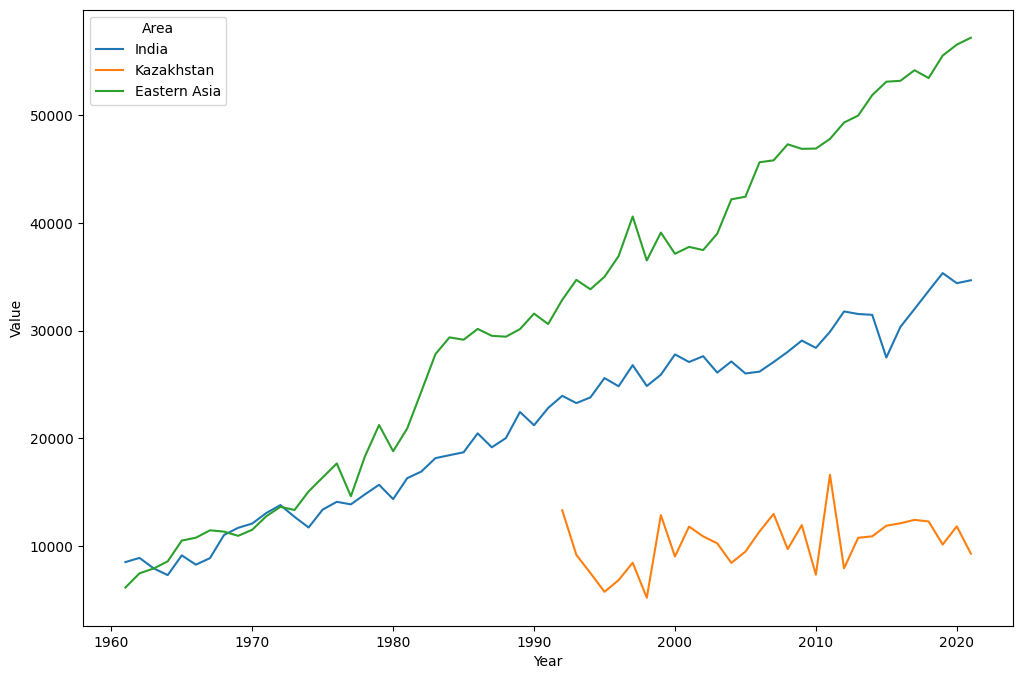

In [47]:
plt.figure(figsize=(12,8))
sns.lineplot(data = random_df, x='Year', y='Value', hue='Area')

In [48]:
new_df = wheat_df[wheat_df.Area.isin(['European Union (27)',
       'Least Developed Countries', 'Land Locked Developing Countries',
       'Small Island Developing States',
       'Low Income Food Deficit Countries'])]

<Axes: xlabel='Year', ylabel='Value'>

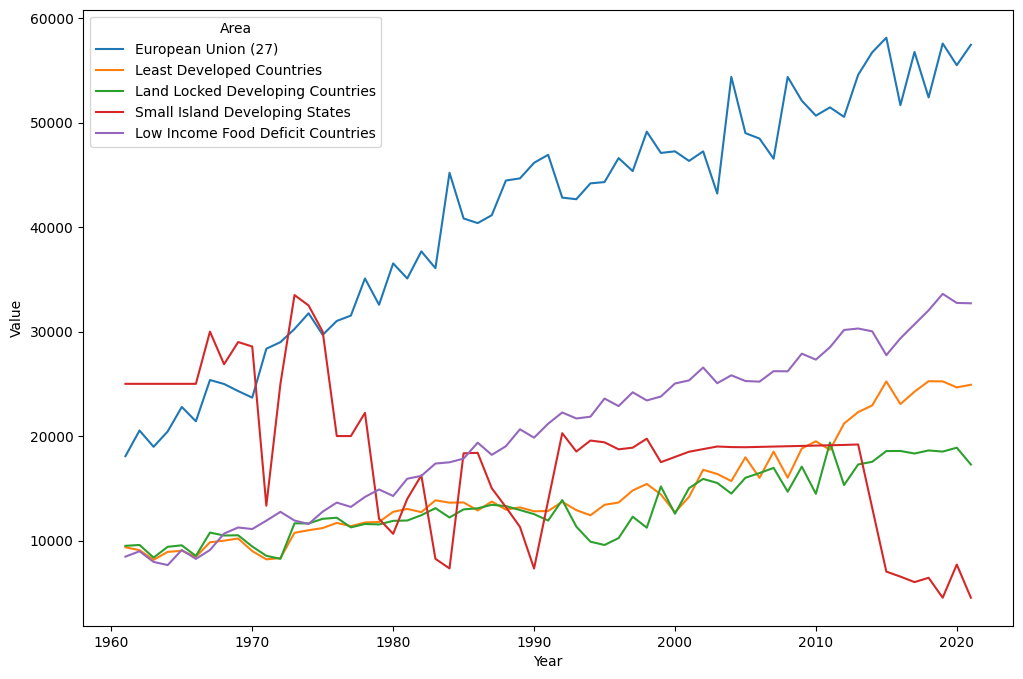

In [49]:
plt.figure(figsize=(12,8))
sns.lineplot(data = new_df, x='Year', y='Value', hue='Area')

Ok, so it seems that the data is compelling. We know that there are no missing values in the retrieved dataset (given the function parameters). But let's check what happened with values for year/country combination where that value would be missing. Starting with wheat df we have already.

In [53]:
wheat_df.isnull().sum()

Area       0
Element    0
Item       0
Year       0
Unit       0
Value      0
dtype: int64

The following subset of countries disregards the regions:

In [75]:
countries = wheat_df.Area.unique()[:-31]
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burundi', 'Cameroon', 'Canada',
       'Chad', 'Chile', 'China', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Croatia', 'Cyprus',
       'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Ecuador', 'Egypt',
       'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Ethiopia PDR',
       'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Guatemala',
       'Honduras', 'Hungary', 'India', 'Iran (Islamic Republic of)',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Li

In [77]:
wheat_df_countries = wheat_df[wheat_df.Area.isin(countries)]

Lets remove countries with less than 90% of the data points (90% of 61 = 55)

In [93]:
valid_countries = wheat_df_countries.groupby('Area').agg('count')['Value'] > 55

In [103]:
valid_countries = list(valid_countries[valid_countries].index.values)

In [104]:
valid_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Bangladesh',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Brazil',
 'Bulgaria',
 'Burundi',
 'Canada',
 'Chad',
 'Chile',
 'China, Taiwan Province of',
 'China, mainland',
 'Colombia',
 'Cyprus',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Ecuador',
 'Egypt',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Guatemala',
 'Honduras',
 'Hungary',
 'India',
 'Iran (Islamic Republic of)',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Jordan',
 'Kenya',
 'Lebanon',
 'Lesotho',
 'Libya',
 'Malawi',
 'Mali',
 'Malta',
 'Mauritania',
 'Mexico',
 'Mongolia',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Netherlands (Kingdom of the)',
 'New Zealand',
 'Niger',
 'Nigeria',
 'Norway',
 'Oman',
 'Pakistan',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Republic of Korea',
 'Romania',
 'Rwanda',
 'Saudi Arabia',
 'South Africa',
 

Although we've ruled out a lot of data, lets start with this data set:

In [107]:
wheat_df_filled = wheat_df[wheat_df.Area.isin(valid_countries)]

In [108]:
wheat_df_filled

,Area,Element,Item,Year,Unit,Value
0,Afghanistan,Yield,Wheat,1961,100 g/ha,10220
1,Afghanistan,Yield,Wheat,1962,100 g/ha,9735
2,Afghanistan,Yield,Wheat,1963,100 g/ha,8317
3,Afghanistan,Yield,Wheat,1964,100 g/ha,9510
4,Afghanistan,Yield,Wheat,1965,100 g/ha,9723
...,...,...,...,...,...,...
6732,Zimbabwe,Yield,Wheat,2017,100 g/ha,17542
6733,Zimbabwe,Yield,Wheat,2018,100 g/ha,26946
6734,Zimbabwe,Yield,Wheat,2019,100 g/ha,39149
6735,Zimbabwe,Yield,Wheat,2020,100 g/ha,47796
